# Health Insurance Cost Price Predication 

Given a dataset containing information about individuals' age, gender, BMI, smoking habits, region, and number of dependents, along with their corresponding health insurance costs, the objective is to develop a linear regression model that can accurately predict health insurance costs for new individual

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load Data

In [4]:
df_insurance = pd.read_csv("insurance.csv")

## Data Exploration

In [5]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df_insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df_insurance.shape

(1338, 7)

In [8]:
df_insurance.size

9366

In [11]:
df_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [12]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Visualisation

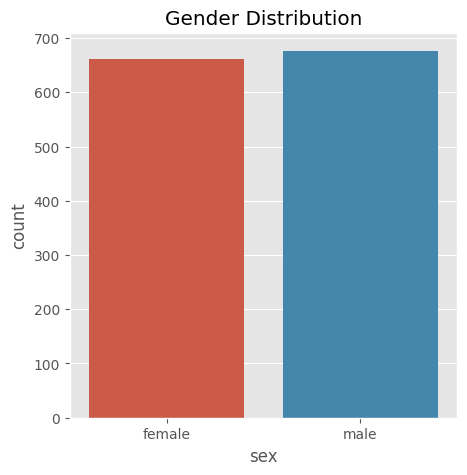

In [18]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex',data=df_insurance)
plt.title('Gender Distribution')
plt.show()

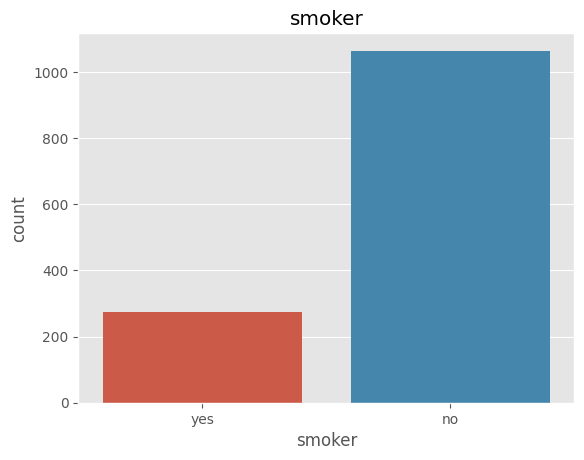

In [19]:
sns.countplot(x='smoker',data=df_insurance)
plt.title('smoker')
plt.show()

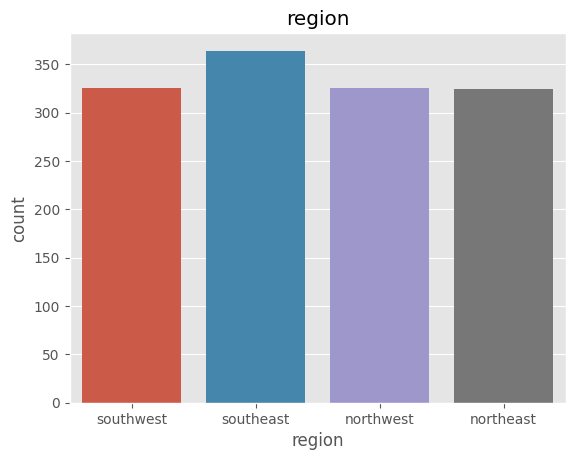

In [20]:
sns.countplot(x='region',data=df_insurance)
plt.title('region')
plt.show()

Text(0.5, 1.0, 'cost vs region')

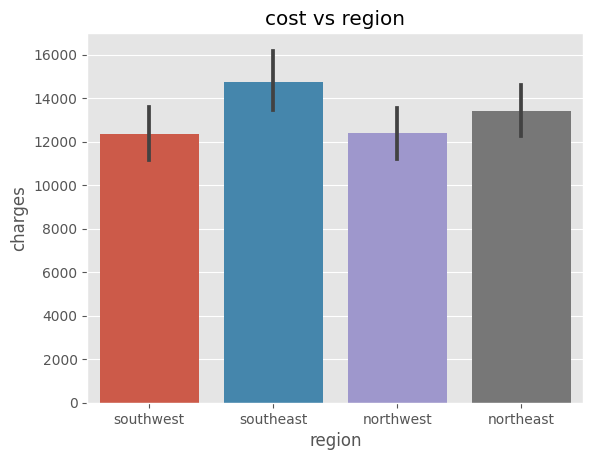

In [21]:
sns.barplot(x='region',y='charges',data=df_insurance)
plt.title('cost vs region')


Text(0.5, 1.0, 'charges for smoker')

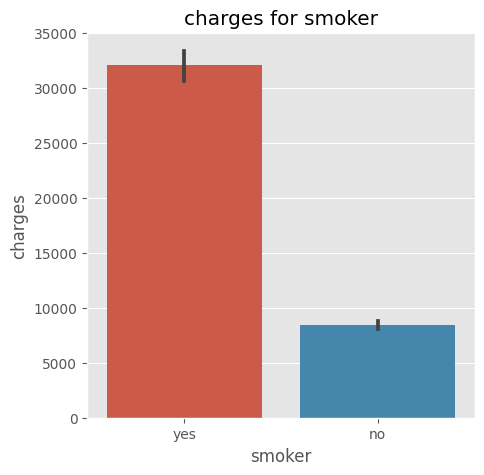

In [22]:
plt.figure(figsize=(5,5))
sns.barplot(x='smoker',y='charges',data=df_insurance)
plt.title('charges for smoker')

Text(0.5, 1.0, 'charges for smoker')

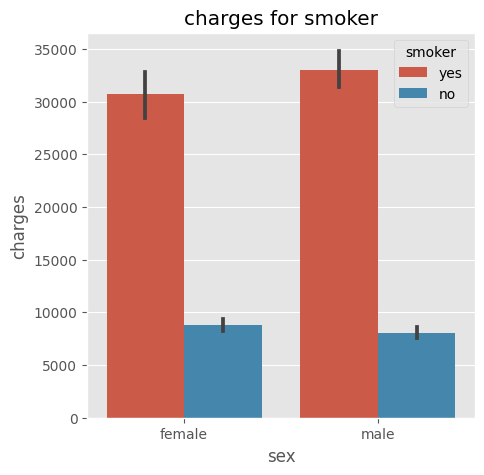

In [23]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker',data=df_insurance)
plt.title("charges for smoker")

<Axes: xlabel='region', ylabel='charges'>

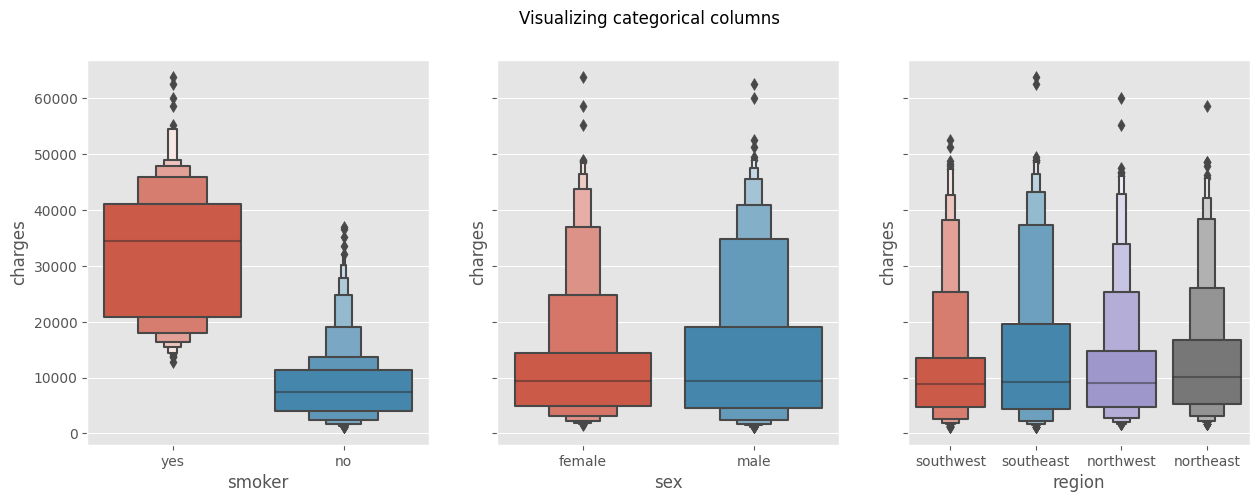

In [24]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=df_insurance, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=df_insurance, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df_insurance, ax=axes[2])

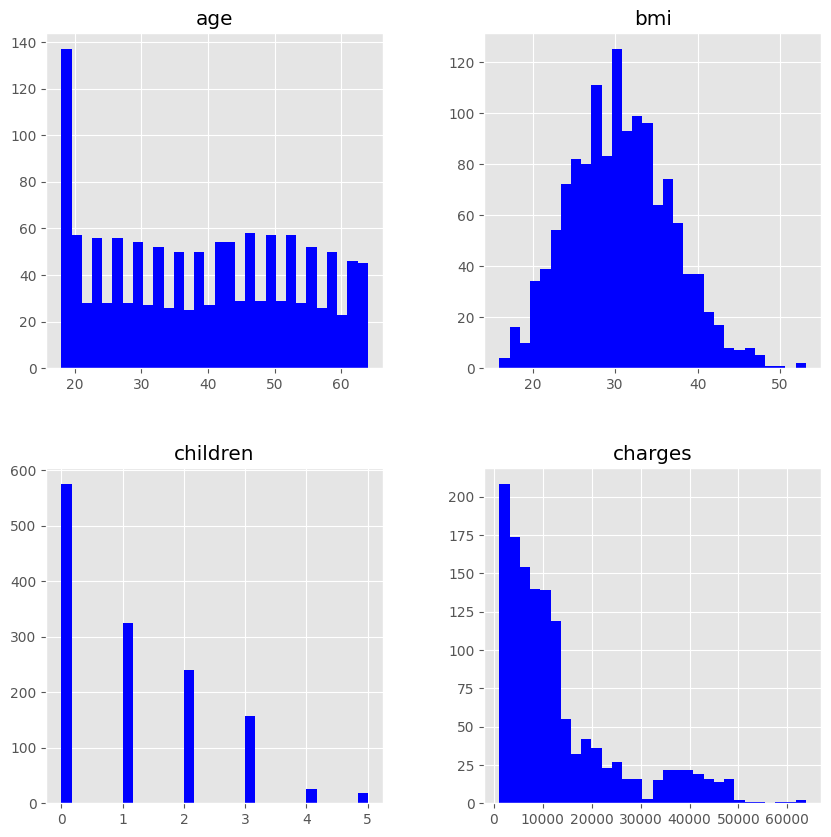

In [25]:
df_insurance[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()


## Feature Enginnering

## Handling Missing Values

In [26]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis

In [36]:
# Feature Extraction
df_insurance['sex'] = df_insurance['sex'].apply({'male':0, 'female':1}.get)
df_insurance['smoker'] = df_insurance['smoker'].apply({'yes':1, 'no':0}.get)
df_insurance['region'] = df_insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)


In [37]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


## Graphical Representatio(Corr)

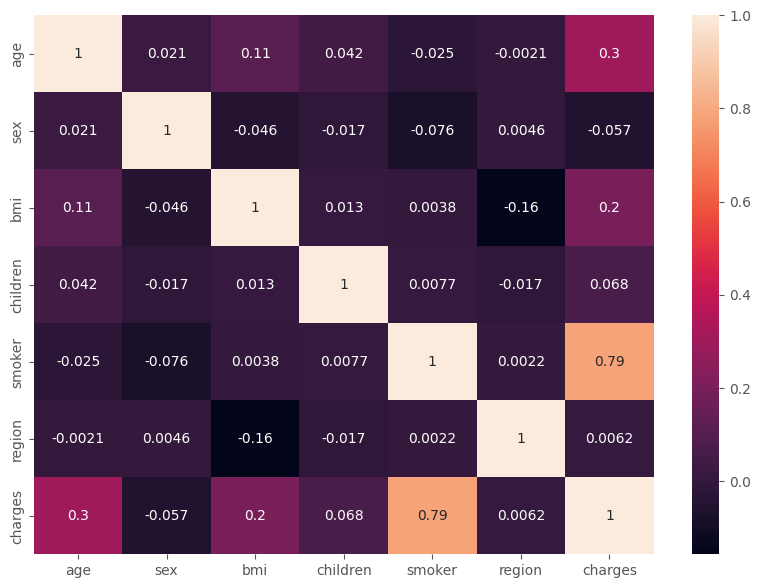

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df_insurance.corr(), annot = True)
plt.show()


# Model Building

### Simple Linear Regression

#### Feature Selection 

In [39]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [40]:
X = df_insurance.drop(['charges', 'sex'], axis=1)
y = df_insurance.charges


### Applying Algorithm

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shpae:  (936,)
y_test shape:  (402,)


In [42]:
linreg = LinearRegression()


In [43]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [48]:
from sklearn.metrics import r2_score


In [49]:
print("R2 score: ",(r2_score(y_test, pred)))


R2 score:  0.7697211527941855


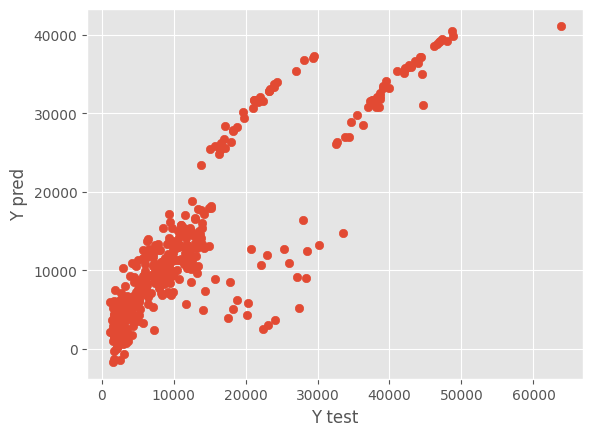

In [44]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()


In [45]:
# NEW DATA USE FOR TEST

In [46]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df


,age,bmi,children,smoker,region
0,50,25,2,1,2


In [47]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)


The medical insurance cost of the new customer is:  [33206.92756082]
